In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st

# Graphics
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
import matplotlib.dates as mdates

# rc('text', usetex=True)
# rc('text.latex', preamble=r'\usepackage{cmbright}')
# rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})

# Magic function to make matplotlib inline;
%matplotlib inline

# This enables SVG graphics inline. 
# There is a bug, so uncomment if it works.
# %config InlineBackend.figure_formats = {'png', 'retina'}

# JB's favorite Seaborn settings for notebooks
rc = {'lines.linewidth': 2, 
      'axes.labelsize': 18, 
      'axes.titlesize': 18, 
      'axes.facecolor': 'DFDFE5'}
sns.set_context('notebook', rc=rc)
sns.set_style("dark")

mpl.rcParams['xtick.labelsize'] = 16 
mpl.rcParams['ytick.labelsize'] = 16 
mpl.rcParams['legend.fontsize'] = 14

In [2]:
df = pd.read_csv('../simulation_output/binary/sim3.csv')

In [3]:
df.head()

,dist,p,t,p_t_2,p_t_1,oddsratio,p_f_2,p_f_1,chi2,p_chi_2,p_chi_1,dof,ex
0,0.4000,0.00004,3.202650,0.005665,0.002832,1.640380,0.000136,0.000068,14.528373,0.000138,0.000069,1,[[ 226.5 273.5]\n [ 226.5 273.5]]
1,0.4001,0.00001,4.493373,0.000423,0.000212,1.723230,0.000027,0.000013,17.579331,0.000028,0.000014,1,[[ 226.5 273.5]\n [ 226.5 273.5]]
2,0.4002,0.00047,3.365948,0.004512,0.002256,1.527640,0.001147,0.000573,10.556006,0.001158,0.000579,1,[[ 220. 280.]\n [ 220. 280.]]
3,0.4003,0.01423,2.463269,0.024190,0.012095,1.327679,0.030594,0.015297,4.672614,0.030647,0.015324,1,[[ 224.5 275.5]\n [ 224.5 275.5]]
4,0.4004,0.00811,3.440358,0.003033,0.001516,1.362174,0.018370,0.009185,5.556006,0.018417,0.009209,1,[[ 220. 280.]\n [ 220. 280.]]


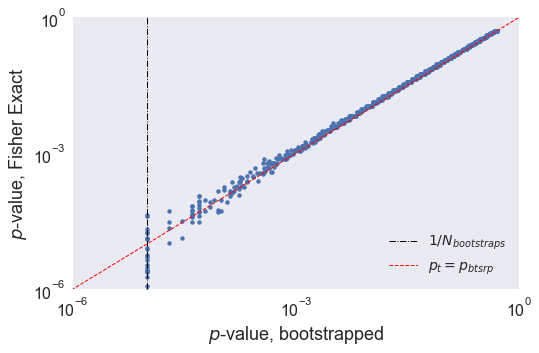

In [10]:
fig, ax = plt.subplots(figsize=(8,5))

sns.regplot(data=df, x='p', y='p_f_1', scatter_kws={'s': 20, 'alpha':1},
            line_kws={'ls':'--', 'lw':1, 'color':'red', 'label': 'best fit line'}, ax=ax, fit_reg=False)
plt.axvline(10**-5, ls='-.', color='k', lw=1, label=r'$1/N_{bootstraps}$')
plt.plot(np.linspace(10**-7, 10), np.linspace(10**-7, 10), '--', lw=1, color='red', label=r'$p_t = p_{btsrp}$')

plt.xlim(10**-6, 1)
plt.ylim(10**-6, 1)

plt.legend()

plt.xscale('log')
plt.yscale('log')

plt.xticks([0.000001, 0.001, 1])
plt.yticks([0.000001, 0.001, 1])

plt.xlabel(r'$p$-value, bootstrapped')
plt.ylabel(r'$p$-value, Fisher Exact')

# plt.savefig('../simulation_output/plots/run2_sim3.svg', bbox_inches='tight')

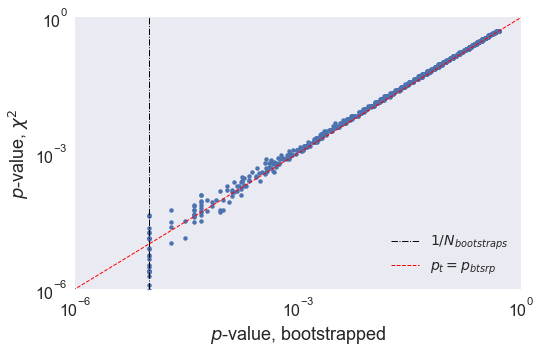

In [13]:
fig, ax = plt.subplots(figsize=(8,5))

sns.regplot(data=df, x='p', y='p_chi_1', scatter_kws={'s': 20, 'alpha':1},
            line_kws={'ls':'--', 'lw':1, 'color':'red', 'label': 'best fit line'}, ax=ax, fit_reg=False)
plt.axvline(10**-5, ls='-.', color='k', lw=1, label=r'$1/N_{bootstraps}$')
plt.plot(np.linspace(10**-7, 10), np.linspace(10**-7, 10), '--', lw=1, color='red', label=r'$p_t = p_{btsrp}$')

plt.xlim(10**-6, 1)
plt.ylim(10**-6, 1)

plt.legend()

plt.xscale('log')
plt.yscale('log')

plt.xticks([0.000001, 0.001, 1])
plt.yticks([0.000001, 0.001, 1])

plt.xlabel(r'$p$-value, bootstrapped')
plt.ylabel(r'$p$-value, $\chi^2$')

# plt.savefig('../simulation_output/plots/run2_sim3.svg', bbox_inches='tight')